<a href="https://colab.research.google.com/github/Gabriel-Leite-Py/DIO_Exercices/blob/main/Confusion_Matrix_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix Metrics
This Python script utilizes the TensorFlow and Keras libraries to conduct a comprehensive analysis of the performance of a deep learning model trained on the MNIST dataset. The code begins by loading and preprocessing the data, normalizing pixel values to a scale between 0 and 1. It then defines and trains a simple convolutional model with Conv2D, MaxPooling2D, and Dense layers.

Following training, the script evaluates the model using metrics commonly associated with confusion matrices. It generates predictions for the test set and calculates the normalized confusion matrix. This matrix is then transformed into a Pandas DataFrame for clearer visualization using the seaborn and matplotlib libraries.

In addition to standard metrics such as Sensitivity and Precision, the script computes additional metrics like Specificity, Accuracy, and F-Score. These metrics provide a comprehensive understanding of the model's performance in terms of true and false positives and negatives.

Towards the end of the script, the metrics are printed with precise control over the number of decimal places, offering a detailed insight into the model's performance across various aspects. This code is versatile and can be adapted to assess both binary and multiclass classification models, providing a useful tool for performance analysis in classification tasks.

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
logdir = "logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

In [17]:
y_true = test_labels

y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 4s 11ms/step


In [18]:
classes=[0,1,2,3,4,5,6,7,8,9]

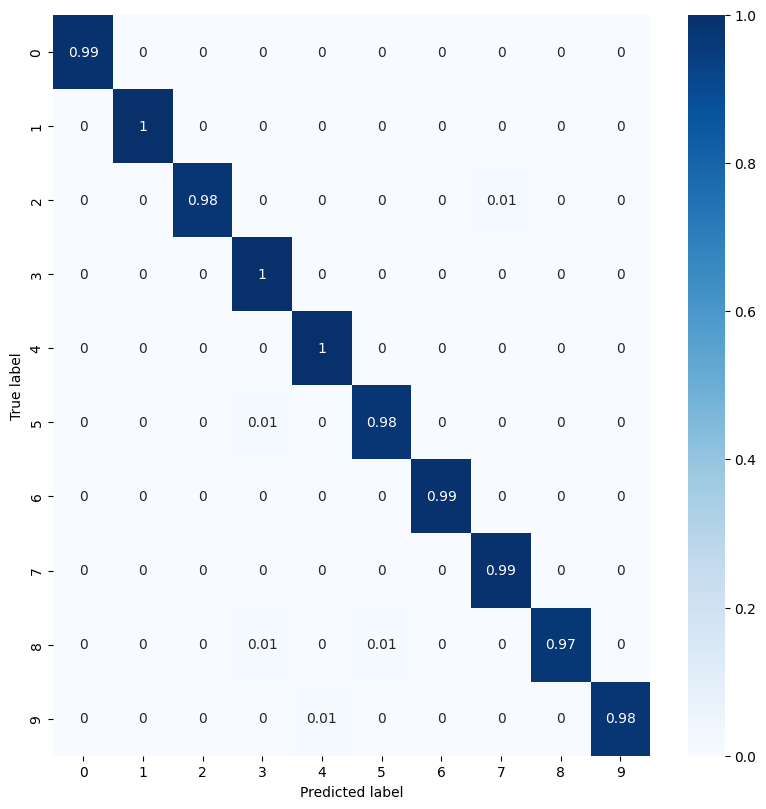

In [20]:
con_mat = tf.math.confusion_matrix(labels = y_true, predictions = y_pred).numpy()
cont_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:,np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(cont_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
VP = con_mat[1, 1]  # Verdadeiro Positivo
FP = con_mat[0, 1]  # Falso Positivo
FN = con_mat[1, 0]  # Falso Negativo
VN = con_mat[0, 0]  # Verdadeiro Negativo
sensibilidade = VP / (VP + FN)
precisao = VP / (VP + FP)
especificidade = VN / (FP + VN)
acuracia = (VP+VN) / (VP+VN+FP+FN)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

In [45]:
"""
print(f'VP: {VP:.0f}')
print(f'VN: {VN:.0f}')
print(f'FP: {FP:.0f}')
print(f'FN: {FN:.0f}')
"""
print(f'Sensibilidade: {sensibilidade:.3f}')
print(f'Especificidade: {especificidade:.3f}')
print(f'Acurácia: {acuracia:.5f}')
print(f'Precisao: {precisao:.5f}')
print(f'F-score: {f_score:.5f}')

Sensibilidade: 1.000
Especificidade: 0.999
Acurácia: 0.99953
Precisao: 0.99912
F-score: 0.99956
